<a href="https://colab.research.google.com/github/spesivan/collab_notes/blob/main/daha_iyi_denemeli_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt

In [72]:
df = pd.read_excel("./renk_koordinatları_2024-02-11 14:16:26:891541.xlsx")

In [73]:
df.head()

,date,X_Kırmızı,Y_Kırmızı,X_Mavi,Y_Mavi,X_Yeşil,Y_Yeşil
0,2024-02-11 14:16:13:133822,21,467,102,467,61,546
1,2024-02-11 14:16:13:258671,21,467,102,467,61,546
2,2024-02-11 14:16:13:289502,21,467,102,467,61,546
3,2024-02-11 14:16:13:330423,21,467,102,467,61,546
4,2024-02-11 14:16:13:362422,21,467,102,467,61,546


In [74]:
df.index = pd.to_datetime(df['date'],format = '%Y-%m-%d %H:%M:%S:%f')
df = df.drop("date", axis = 1)
df.head()

,X_Kırmızı,Y_Kırmızı,X_Mavi,Y_Mavi,X_Yeşil,Y_Yeşil
date,,,,,,
2024-02-11 14:16:13.133822,21,467,102,467,61,546
2024-02-11 14:16:13.258671,21,467,102,467,61,546
2024-02-11 14:16:13.289502,21,467,102,467,61,546
2024-02-11 14:16:13.330423,21,467,102,467,61,546
2024-02-11 14:16:13.362422,21,467,102,467,61,546


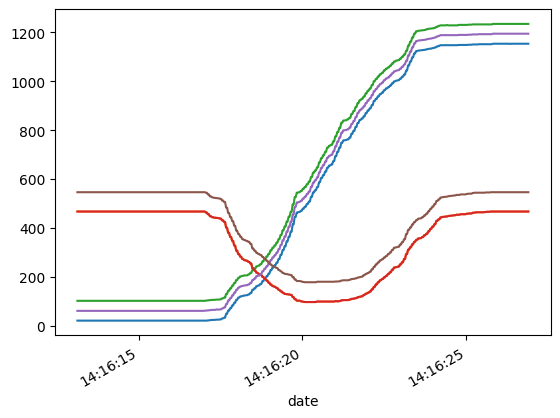

In [75]:
liste = ["X_Kırmızı",	"Y_Kırmızı"	,"X_Mavi",	"Y_Mavi"	,"X_Yeşil"	,"Y_Yeşil"]
for i in range(0,6):
  temp = df[liste[i]]
  temp.plot()

In [76]:
red_values_reshaped = pd.concat([df.iloc[:, 0],df.iloc[:, 1]], axis = 1).values.reshape((-1,2))
blue_values_reshaped = pd.concat([df.iloc[:, 2],df.iloc[:, 3]], axis = 1).values.reshape((-1,2))
green_values_reshaped = pd.concat([df.iloc[:, 4],df.iloc[:, 5]], axis = 1).values.reshape((-1,2))

In [105]:
all_hotties = df.iloc[:, 0:6].values.reshape((-1, 6))
all_hotties

array([[  21,  467,  102,  467,   61,  546],
       [  21,  467,  102,  467,   61,  546],
       [  21,  467,  102,  467,   61,  546],
       ...,
       [1153,  467, 1234,  467, 1194,  546],
       [1153,  467, 1234,  467, 1194,  546],
       [1153,  467, 1234,  467, 1194,  546]])

In [106]:
len(all_hotties)

443

In [119]:
all_hotties_y1 = df.iloc[9:, 0:6].values.reshape((-1, 6))
all_hotties_y1.shape

(434, 6)

In [120]:
# red_values_reshaped

In [121]:
def array_split(array, size=5):
    satir, sutun = array.shape
    yeni_satir = satir - size + 1
    yeni_sutun = size

    yeni_array = np.empty((yeni_satir, yeni_sutun, sutun), dtype=array.dtype)

    for i in range(yeni_satir):
        yeni_array[i] = array[i:i+size]

    return yeni_array

In [122]:
red_resized_array = array_split(red_values_reshaped)
green_resized_array = array_split(green_values_reshaped)
blue_resized_array = array_split(blue_values_reshaped)
all_hotties_resized_array = array_split(all_hotties)

In [123]:
X1 = all_hotties_resized_array

In [124]:
y1 = all_hotties_y1

In [125]:
print(len(X1))
print(len(y1))

439
434


In [126]:
a = round(len(X1) * 0.55)
b = round(len(X1) * 0.65)

X_train1, y_train1 = X1[:a], y1[:a]
X_val1, y_val1 = X1[a:b], y1[a:b]
X_test1, y_test1 = X1[b:], y1[b:]

In [127]:
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((241, 5, 6), (241, 6), (44, 5, 6), (44, 6), (154, 5, 6), (149, 6))

In [86]:
# red_resized_array
# all_hotties_resized_array

In [87]:
# !pip install tensorflow

In [128]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense , LSTM
from tensorflow.keras.models import load_model

In [133]:
model1 = Sequential()
model1.add(InputLayer((5, 6)))   ####   X_train1.shape is (5,1)
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                18176     
                                                                 
 dense_2 (Dense)             (None, 8)                 520       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 18705 (73.07 KB)
Trainable params: 18705 (73.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [134]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [140]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp1])

Epoch 1/10
8/8 [==============================] - 7s 587ms/step - loss: 117521.8203 - root_mean_squared_error: 342.8145 - val_loss: 378841.7812 - val_root_mean_squared_error: 615.5012
Epoch 2/10
8/8 [==============================] - 4s 604ms/step - loss: 117496.6172 - root_mean_squared_error: 342.7778 - val_loss: 378809.8750 - val_root_mean_squared_error: 615.4753
Epoch 3/10
8/8 [==============================] - 4s 615ms/step - loss: 117476.0547 - root_mean_squared_error: 342.7478 - val_loss: 378769.2188 - val_root_mean_squared_error: 615.4423
Epoch 4/10
8/8 [==============================] - 4s 515ms/step - loss: 117454.3984 - root_mean_squared_error: 342.7162 - val_loss: 378682.2812 - val_root_mean_squared_error: 615.3716
Epoch 5/10
8/8 [==============================] - 4s 613ms/step - loss: 117430.8203 - root_mean_squared_error: 342.6818 - val_loss: 378599.4688 - val_root_mean_squared_error: 615.3044
Epoch 6/10
8/8 [==============================] - 4s 590ms/step - loss: 117407.7

In [141]:
model1 = load_model('model1/')

In [142]:
train_predictions = model1.predict(X_train1).flatten()
train_predictions

8/8 [==============================] - 0s 4ms/step


array([1.1021203 , 1.1021203 , 1.1021203 , 1.1021203 , 1.1021203 ,
       1.1021203 , 1.1021203 , 1.1021203 , 1.1021203 , 1.1021203 ,
       1.1021203 , 1.1021203 , 1.1021203 , 1.1021203 , 1.1021203 ,
       1.1021203 , 1.1021203 , 1.1021203 , 1.1021203 , 1.1021203 ,
       1.1021203 , 1.1021203 , 1.1021203 , 1.1021203 , 1.1021203 ,
       1.1021203 , 1.1021203 , 1.1021203 , 1.1021203 , 1.1021203 ,
       1.1021203 , 1.1021203 , 1.1021203 , 1.1021203 , 1.1021203 ,
       1.1021203 , 1.1021203 , 1.1021203 , 1.1021203 , 1.1021203 ,
       1.1021203 , 1.1021203 , 1.1021203 , 1.1021203 , 1.1021203 ,
       1.1021203 , 1.1021203 , 1.1021203 , 1.1021203 , 1.1021203 ,
       1.1021203 , 1.1021203 , 1.1021203 , 1.1021203 , 1.1021203 ,
       1.1021203 , 1.1021203 , 1.1021203 , 1.1021203 , 1.1021203 ,
       1.1021203 , 1.1021203 , 1.1021203 , 1.1021203 , 1.1021203 ,
       1.1021203 , 1.1021203 , 1.1021203 , 1.1021203 , 1.1021203 ,
       1.1021203 , 1.1021203 , 1.1021203 , 1.1021203 , 1.10212

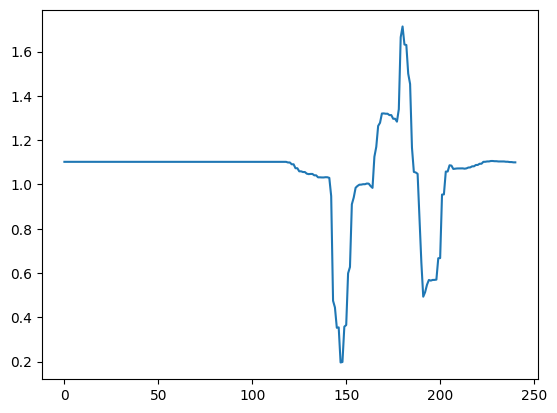

In [145]:
plt.plot(train_predictions)
plt.show()